Ejercicio 1

Un conjunto de datos registra:

● Velocidad: velocidad promedio del vehículo en km/h

● Consumo: litros de combustible consumidos cada 100 km
Tareas:

1. Ajustar un modelo de regresión lineal que relacione la Velocidad con el Consumo.
2. Representar en un gráfico los datos reales y la línea de regresión.
3. Estimar el consumo de un vehículo que circula a 110 km/h.
4. ¿Qué velocidad se asocia con el menor consumo según el modelo? Justificá si es confiable esa estimación. *texto en cursiva*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('https://raw.githubusercontent.com/ULP-UGD/Programacion_Avanzada/refs/heads/main/TP12/consumo_velocidad.csv')
X = data[['Velocidad']]
y = data['Consumo']

In [2]:
model = LinearRegression()
model.fit(X, y)

# Obtener coeficientes
pendiente = model.coef_[0]
intercepto = model.intercept_
print(f"Ecuación: Consumo = {pendiente:.4f} * Velocidad + {intercepto:.4f}")

Ecuación: Consumo = 0.0043 * Velocidad + 6.5286


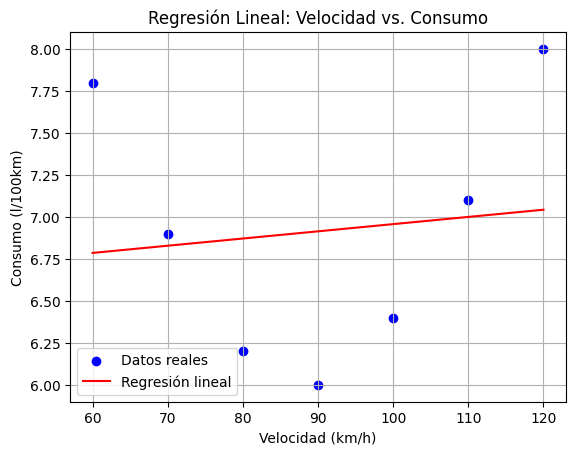

In [3]:
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Regresión lineal')
plt.xlabel('Velocidad (km/h)')
plt.ylabel('Consumo (l/100km)')
plt.title('Regresión Lineal: Velocidad vs. Consumo')
plt.legend()
plt.grid()
plt.show()

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
consumo_110 = model.predict([[110]])[0]
print(f"Consumo estimado a 110 km/h: {consumo_110:.2f} l/100km")

Consumo estimado a 110 km/h: 7.00 l/100km


In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

a = model_poly.coef_[2]
b = model_poly.coef_[1]
velocidad_optima = -b/(2*a)
print(f"Velocidad óptima para mínimo consumo: {velocidad_optima:.2f} km/h")

Velocidad óptima para mínimo consumo: 88.95 km/h
